<a href="https://colab.research.google.com/github/katiesalas/data_analytics_2/blob/main/Covid19_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hong Zhao, Katie Salas, Fahema Nabi

> Indented block



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
sd_df = df[df['state'] == 'South Dakota']


In [ ]:
sd_df.head()

,date,state,fips,cases,deaths
486,2020-03-10,South Dakota,46,5,1
530,2020-03-11,South Dakota,46,8,1
577,2020-03-12,South Dakota,46,8,1
628,2020-03-13,South Dakota,46,9,1
679,2020-03-14,South Dakota,46,9,1


In [ ]:
sd_df.shape

(312, 5)

In [ ]:
sd_df.tail()

,date,state,fips,cases,deaths
17328,2021-01-11,South Dakota,46,103499,1585
17383,2021-01-12,South Dakota,46,103743,1585
17438,2021-01-13,South Dakota,46,104195,1604
17493,2021-01-14,South Dakota,46,104512,1614
17548,2021-01-15,South Dakota,46,104937,1629


In [ ]:
#first death in SD
first_sd_death = sd_df[sd_df['deaths']!=0]
first_sd_death.head()

,date,state,fips,cases,deaths
486,2020-03-10,South Dakota,46,5,1
530,2020-03-11,South Dakota,46,8,1
577,2020-03-12,South Dakota,46,8,1
628,2020-03-13,South Dakota,46,9,1
679,2020-03-14,South Dakota,46,9,1


In [ ]:
#total number of cases
sd_df['cases'].max()

104937

In [ ]:
#total number of deaths
sd_df['deaths'].max()

1629

In [ ]:
# not a correct way of calculating total count bcoz data is cumulative
sd_df['cases'].sum()

8754478

In [ ]:
#new cases for SD
type(sd_df['cases'])

newcase = []
previuos_case = 0
for index, row in sd_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
print(newcase_count)

425


In [ ]:
sd_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.

In [ ]:
sd_df.head(10)

,date,state,fips,cases,deaths,new_cases
486,2020-03-10,South Dakota,46,5,1,5
530,2020-03-11,South Dakota,46,8,1,3
577,2020-03-12,South Dakota,46,8,1,0
628,2020-03-13,South Dakota,46,9,1,1
679,2020-03-14,South Dakota,46,9,1,0
732,2020-03-15,South Dakota,46,9,1,0
785,2020-03-16,South Dakota,46,10,1,1
838,2020-03-17,South Dakota,46,11,1,1
892,2020-03-18,South Dakota,46,11,1,0
946,2020-03-19,South Dakota,46,14,1,3


In [ ]:
sd_df['new_cases'].sum()

104937

In [ ]:
sd_cases = sd_df['cases']
sd_deaths = sd_df['deaths']
sd_dates = sd_df['date']
sd_new_cases = sd_df['new_cases']

In [ ]:
type(sd_new_cases)

pandas.core.series.Series

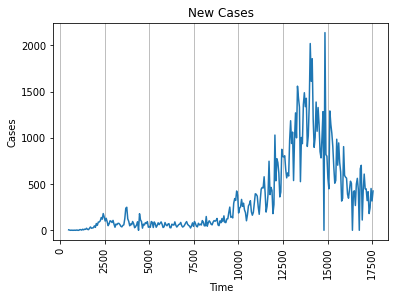

In [ ]:
sd_df['new_cases'].plot(kind='line')
plt.title ('New Cases')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.grid(axis='x')
plt.xticks(rotation=90)

plt.show()

In [ ]:
sd_df.loc[:, 'date'] = pd.to_datetime(sd_df.loc[:, 'date'])

sd_df['month'] = sd_df['date'].dt.month

sd_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,state,fips,cases,deaths,new_cases,month
486,2020-03-10,South Dakota,46,5,1,5,3
530,2020-03-11,South Dakota,46,8,1,3,3
577,2020-03-12,South Dakota,46,8,1,0,3
628,2020-03-13,South Dakota,46,9,1,1,3
679,2020-03-14,South Dakota,46,9,1,0,3


In [ ]:
sd_df.loc[(sd_df['month'] == 8) |\
          (sd_df['month'] == 9)]

,date,state,fips,cases,deaths,new_cases,month
8363,2020-08-01,South Dakota,46,8867,134,103,8
8418,2020-08-02,South Dakota,46,8955,135,88,8
8473,2020-08-03,South Dakota,46,9020,135,65,8
8528,2020-08-04,South Dakota,46,9079,136,59,8
8583,2020-08-05,South Dakota,46,9168,137,89,8
...,...,...,...,...,...,...,...
11443,2020-09-26,South Dakota,46,21133,218,579,9
11498,2020-09-27,South Dakota,46,21541,218,408,9
11553,2020-09-28,South Dakota,46,21738,218,197,9
11608,2020-09-29,South Dakota,46,21997,223,259,9


In [ ]:
aug_dec = sd_df.loc[(sd_df['month'] == 8) |\
                    (sd_df['month'] == 12)].reset_index()


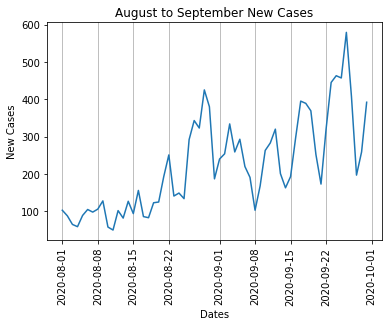

In [ ]:
dates = aug_sep.loc[:, 'date']
new_cases = aug_sep.loc[:, 'new_cases']

plt.plot(dates, new_cases)
plt.title("August to September New Cases")
plt.xlabel('Dates')
plt.ylabel('New Cases')
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.show()

In [ ]:


plt.plot(days, new_cases)
plt.title("2020 New Cases")
plt.xlabel('Dates')
plt.ylabel('New Cases')
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.show()

NameError: ignored

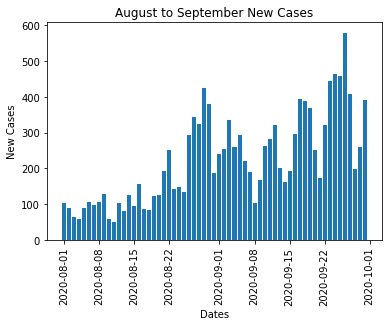

In [ ]:
plt.bar(dates, new_cases)
plt.title("August to September New Cases")
plt.xlabel('Dates')
plt.ylabel('New Cases')
plt.xticks(rotation=90)
plt.show()

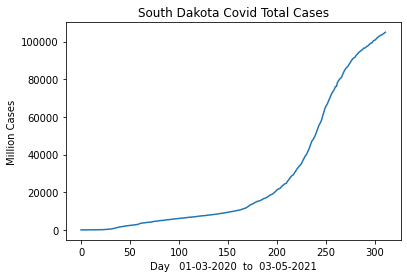

In [ ]:
sd_cases = sd_df['cases']
sd_deaths = sd_df['deaths']
sd_dates = sd_df['date']
sd_new_cases = sd_df['new_cases']

days = range(len(sd_df.iloc[:, 0])) 

plt.plot(days, sd_cases)
plt.title('South Dakota Covid Total Cases')
plt.xlabel('Day   01-03-2020  to  03-05-2021')
plt.ylabel('Million Cases')
plt.show()


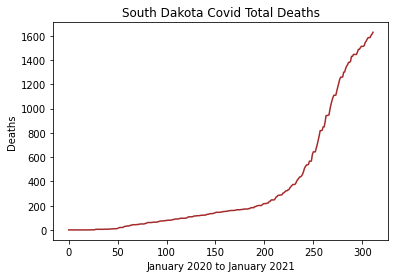

In [ ]:


plt.plot(days, sd_df['deaths'], color='brown')
plt.title('South Dakota Covid Total Deaths')
plt.xlabel('January 2020 to January 2021')
plt.ylabel('Deaths')
plt.show()

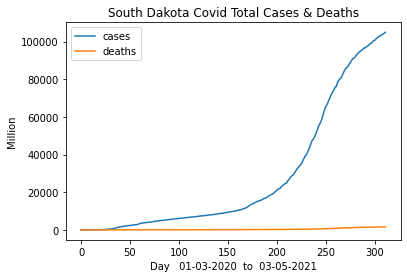

In [ ]:
plt.plot(days, sd_df['cases'], label='cases')

plt.plot(days, sd_df['deaths'], label='deaths')

plt.title('South Dakota Covid Total Cases & Deaths')
plt.xlabel('Day   01-03-2020  to  03-05-2021')
plt.ylabel('Million')
plt.legend()

plt.show()

In [ ]:
sd_df.head()

,date,state,fips,cases,deaths,new_cases,month
486,2020-03-10,South Dakota,46,5,1,5,3
530,2020-03-11,South Dakota,46,8,1,3,3
577,2020-03-12,South Dakota,46,8,1,0,3
628,2020-03-13,South Dakota,46,9,1,1,3
679,2020-03-14,South Dakota,46,9,1,0,3


In [ ]:
days = range(len(sd_df.iloc[:,0]))

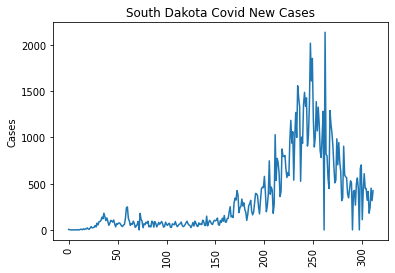

In [ ]:
plt.plot(days, sd_new_cases)
plt.title('South Dakota Covid New Cases')
plt.xticks(rotation='vertical')
plt.ylabel('Cases')
plt.show()

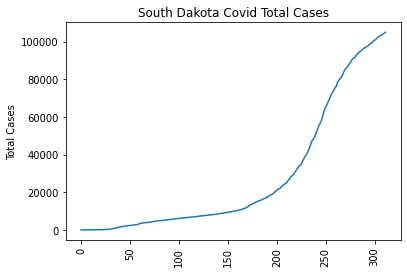

In [ ]:
plt.plot(days, sd_cases)
plt.title('South Dakota Covid Total Cases')
plt.xticks(rotation='vertical')
plt.ylabel('Total Cases')
plt.show()

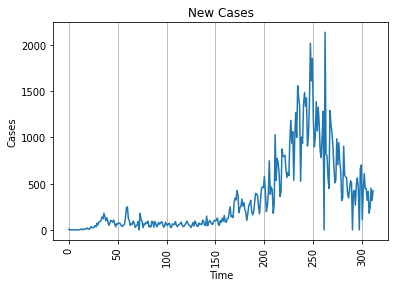

In [ ]:
plt.plot(days, sd_new_cases)
plt.title ('New Cases')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.grid(axis='x')
plt.xticks(rotation=90)

plt.show()

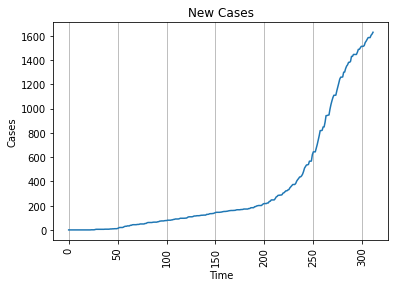

In [ ]:
plt.plot(days, sd_deaths)
plt.title ('New Cases')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.grid(axis='x')
plt.xticks(rotation=90)

plt.show()

In [ ]:
sd_df.head()

,date,state,fips,cases,deaths,new_cases,month
486,2020-03-10,South Dakota,46,5,1,5,3
530,2020-03-11,South Dakota,46,8,1,3,3
577,2020-03-12,South Dakota,46,8,1,0,3
628,2020-03-13,South Dakota,46,9,1,1,3
679,2020-03-14,South Dakota,46,9,1,0,3


In [ ]:
sd_df['month_year'] = sd_df['date'].dt.to_period('M')
sd_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,state,fips,cases,deaths,new_cases,month,month_year
486,2020-03-10,South Dakota,46,5,1,5,3,2020-03
530,2020-03-11,South Dakota,46,8,1,3,3,2020-03
577,2020-03-12,South Dakota,46,8,1,0,3,2020-03
628,2020-03-13,South Dakota,46,9,1,1,3,2020-03
679,2020-03-14,South Dakota,46,9,1,0,3,2020-03
...,...,...,...,...,...,...,...,...
17328,2021-01-11,South Dakota,46,103499,1585,181,1,2021-01
17383,2021-01-12,South Dakota,46,103743,1585,244,1,2021-01
17438,2021-01-13,South Dakota,46,104195,1604,452,1,2021-01
17493,2021-01-14,South Dakota,46,104512,1614,317,1,2021-01


In [ ]:
sd_df.groupby('month_year')['new_cases'].sum().reset_index()

,month_year,new_cases
0,2020-03,107
1,2020-04,2343
2,2020-05,2543
3,2020-06,1771
4,2020-07,2000
5,2020-08,4745
6,2020-09,8880
7,2020-10,23603
8,2020-11,34472
9,2020-12,18700


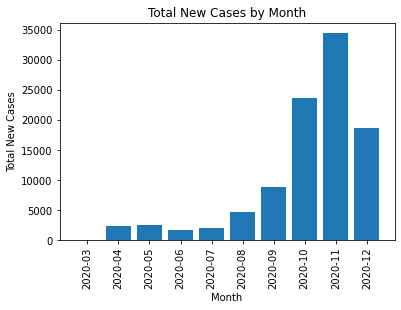

In [ ]:
sum_months = sd_df.groupby('month_year')['new_cases'].sum().reset_index()

sum_months.drop(index=10, inplace=True)

months = sum_months.loc[:, 'month_year'].dt.strftime('%Y-%m')
cases = sum_months.loc[:, 'new_cases']

plt.bar(months, cases)
plt.title("Total New Cases by Month")
plt.xlabel('Month')
plt.ylabel('Total New Cases')
plt.xticks(rotation=90)
plt.show()

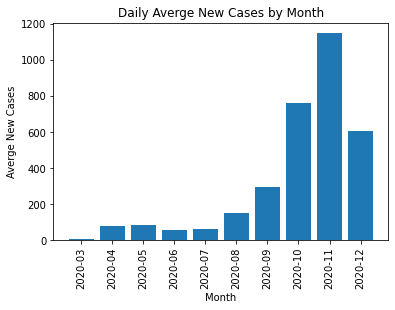

In [ ]:
mean_months = sd_df.groupby('month_year')['new_cases'].mean().reset_index()

mean_months.drop(index=10, inplace=True)

months = mean_months.loc[:, 'month_year'].dt.strftime('%Y-%m')
cases = mean_months.loc[:, 'new_cases']

plt.bar(months, cases)
plt.title("Daily Averge New Cases by Month")
plt.xlabel('Month')
plt.ylabel('Averge New Cases')
plt.xticks(rotation=90)
plt.show()

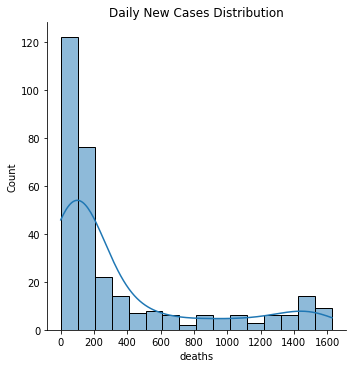

In [ ]:
import seaborn as sns

sns.displot(sd_deaths, kde=True)\
.set(title='Daily New Cases Distribution')
plt.show()

# Last 30 Days

In [ ]:
sd_cases_30 = sd_df['cases'][-31:-1]
sd_deaths_30 = sd_df['deaths'] [-31:-1]
sd_dates_30 = sd_df['date'][-31:-1]
sd_new_cases_30 = sd_df['new_cases'][-31:-1]

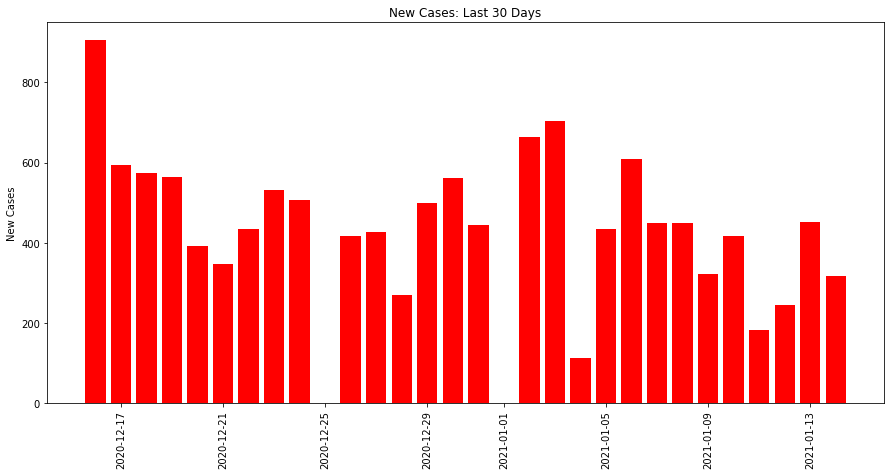

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=sd_dates_30, height=sd_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.title('New Cases: Last 30 Days')

plt.ylabel('New Cases')
plt.show()

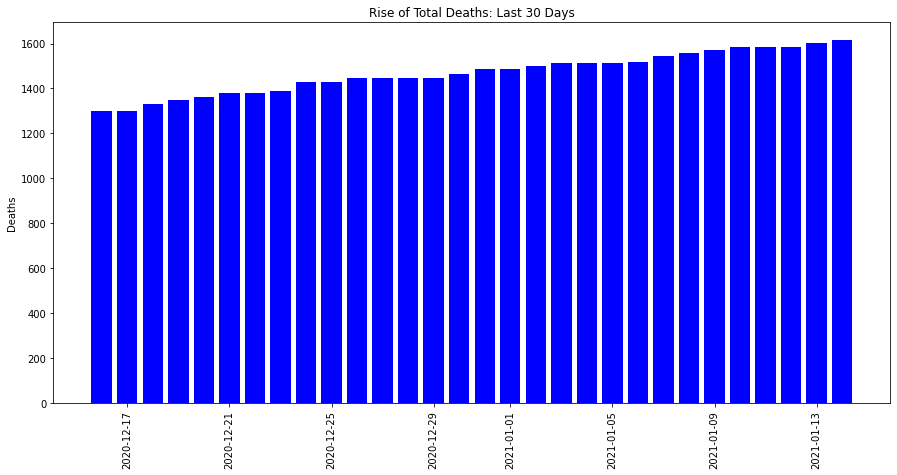

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=sd_dates_30, height=sd_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.title('Rise of Total Deaths: Last 30 Days')

plt.ylabel('Deaths')
plt.show()

# Comparing with different States


In [ ]:
states = ['Minnesota', 'North Dakota','Oklahoma', 'South Dakota', 'Wyoming']

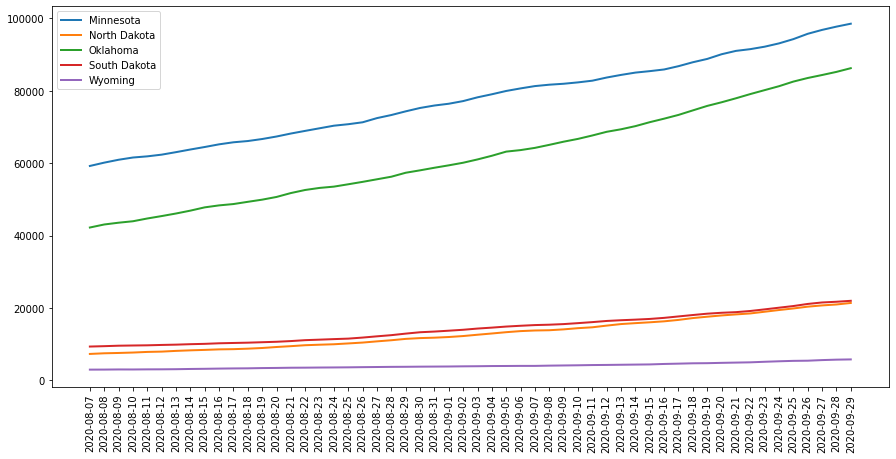

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-08-07') & (df['date']<'2020-09-30')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


## Conclusions: 
- South dakota's total COVID cases began to spike around September, which suggests a super spreeader event occurred in the summer that caused an increase in infections. 

- Spikes around the holidays may be due to tracel and family gatherings. Colder weather forces people insode where COVID is more likely to spread 

- South Dakota hits its worst point in the pandemic in November, with the highest number of total new cases and the highest dailt average new cases. 

- South Dakota, less densely populated, has had fewer cases than Florida, New York and Arizona.

- South Dakota does not have a state-wide mask mandate. Therefore, while it may look like there is a decline in the last 30 days, compared to the last four months, with a highly contagious new strain identified in the US, there is a likely chance of cases rising again. 